In [64]:
import wandb
import matplotlib.pyplot as plt
import scipy
plt.rcParams["axes.grid"] = False

sys.path.append('..')

In [45]:
language = 'english'

sys.argv = [
"--device cuda",
"--data-folder", "..\\data",
"--seed", "13",
"--configuration", "char-to-char",
"--language", language,
"--challenge", "post-ocr-correction"]

In [46]:
# Configure container:
from dependency_injection.ioc_container import IocContainer

container = IocContainer()

In [47]:
plot_service = container.plot_service()

In [48]:
entity = 'eval-historical-texts'
project = 'post-ocr-correction'

run_ids = ['sz5x3cct']

In [49]:
def create_wandb_api(run_id: str):
    api = wandb.Api()
    run = api.run(f'{entity}/{project}/{run_id}')
    return run

def get_run_histogram(run_api: wandb.Api):
    original_histogram = (
        run_api.summary['original-edit-distances-bins'],
        run_api.summary['original-edit-distances-count']
    )

    best_histogram = (
        run_api.summary['best-results-edit-distances-bins'],
        run_api.summary['best-results-edit-distances-count']
    )
    
    return (original_histogram, best_histogram)

In [50]:
run_apis = [create_wandb_api(run_id) for run_id in run_ids]
run_histograms = [get_run_histogram(run_api) for run_api in run_apis]

wandb: Downloading summary data...


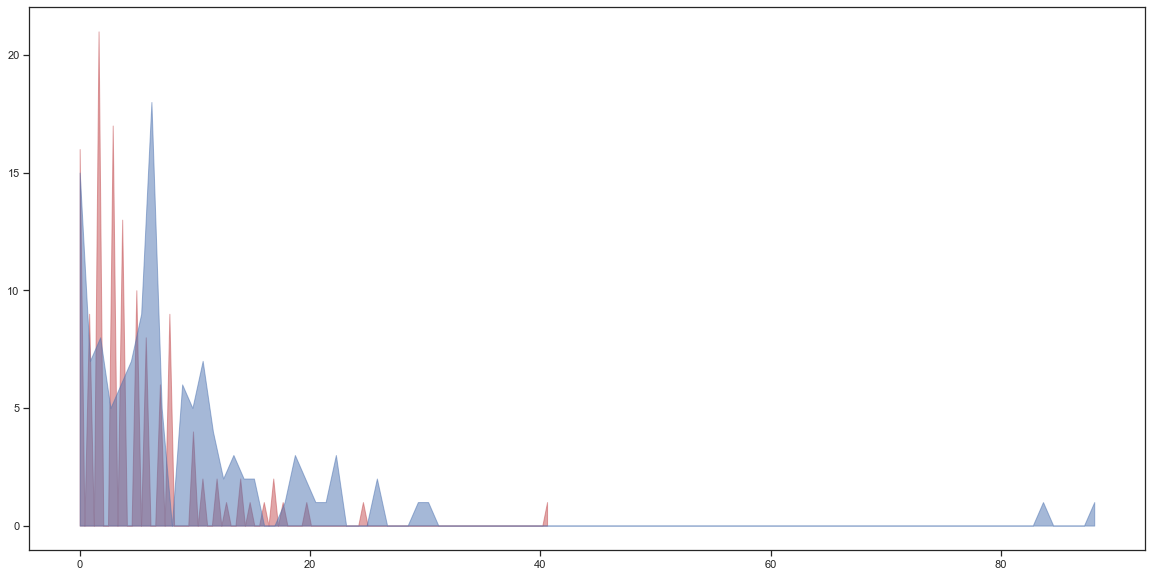

In [84]:
def plot_histogram(xs, ys, color='r'):
    new_xs = []
    new_ys = []

    for x, y in zip(xs, ys):
        if y > -1:
            new_xs.append(x)
            new_ys.append(y)

    # plt.plot(new_xs, new_ys, color)
    plt.fill_between(new_xs, new_ys, interpolate=True, color=color, alpha=0.5)

for run_histogram in run_histograms:
    plot_histogram(run_histogram[0][0][:-1], run_histogram[0][1], 'r')
    plot_histogram(run_histogram[1][0][:-1], run_histogram[1][1], 'b')
    break

plt.show()